In [1]:
import numpy as np
from Coursework.ANNModel import model as mod
from Coursework.ANNModel import data as d
from Coursework.PSO import pswarm as ps
from Coursework.PSO import psobehaviour as psh
from Coursework.PSO import history as hs
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

D:\GitProjects\Bio-comp\Coursework\ANNModel\model.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Cubic (10 runs) mean fitness: 36.35011784882427
Cubic_pso_config_mean = [90.38687483,  5.98667815,  1.08064781,  1.46586089,  0.53518642, 1.09814992,  1.47658579]

# Linear (10 runs) mean fintess: 1103190071387.8752
Linear_pso_config_mean = [85.37707185,  6.86909089,  0.51382895,  0.9798064,  0.12477974, 0.59493009,  0.89702589]

# Tanh (10 runs) mean fitness: 25.520455427936067
Tanh_pso_config_mean = [55.32621771,  7.52578441,  0.12798331,  0.72531664,  1.08313114, 0.29216353,  1.3627685 ]

# Sine (10 runs) mean fitness: 434
Sine_pso_config_mean = [8.73729926e+01, 7.54895398e+00, 7.33998847e-01, 7.52228076e-02,
       2.92737853e-01, 3.09977124e-01, 8.51531051e-01]

# Complex (10 runs) mean fitness: 12
Complex_pso_config_mean = [82.66312781,  5.85540776,  0.62559032,  0.58225519,  0.26541185,
        1.38181036,  0.6510299 ]

# Xor (10 runs) mean fitness: 2710748526
Xor_pso_config_mean = [96.15250011,  7.08445513,  0.53364588,  0.62468836,  1.57375821,
        1.50229261,  0.17895104]


In [3]:
# Cubic Most fit model: 55.21568414718436
Cubic_ann_params = np.array([ 4.78225917, -0.45809605, -0.21994928,  0.81358392,  0.18922872,
        0.70214767, -0.81948744,  0.71403473, -0.02265093,  0.26644057,
       -0.60531157,  0.69434508, -0.44034252,  0.64224264,  0.7446249])

# Linear Most fit model: 10965948279221.076
Linear_ann_params = np.array([ 0.15520314,  0.2222954 ,  0.47238101, -0.83439247, -0.27726962,
        0.11339216, -0.7816949 , -0.79196132, -0.3392678 ,  0.41548984,
       -0.08055252,  0.12817675, -0.71425698, -0.21576561, -0.7553213 ])

# Tanh Most fit model: 39.38730853575883
Tanh_ann_params = np.array([ 0.09854553,  0.39395654, -0.33737974, -0.12358008,  0.4334227 ,
       -0.98235414, -0.99205521,  0.98638961, -0.97515305,  2.33845816,
        0.51783499, -0.96708832, -0.9922467 ,  0.9696207 , -0.99365926])

# Sine Most fit model: 4212
Sine_ann_params = np.array([ 0.26515734,  0.7400037 , -0.0499965 ,  0.32639921,  0.03951493,
        0.93575309,  0.82658881,  0.95566027,  0.89756768,  3.01482873,
       -0.62419448, -0.9322514 , -0.99330274, -0.85322129, -0.65752741])

# Complex Most fit model: 15.36
Complex_ann_params = np.array([ 5.16794124, -0.50701965, -0.02085653, -0.67915966, -0.56917589,
        0.93068562,  0.25302176,  0.92653444,  0.67209426,  0.39299595,
       -0.75832145, -0.44806736, -0.62409455,  2.26094952, -0.26506833,
       -0.86461154,  0.31096583,  0.90781783,  0.72454439])

# Xor Most fit model: 27107485189
Xor_ann_params = np.array([-0.13057076, -0.66250843,  0.0122888 , -0.4294471 , -0.56088656,
        0.76634383,  0.95302873,  0.27348615,  0.86272884,  0.79509781,
        0.80510636,  0.08453014,  0.86190117,  3.37130705, -0.79043449,
        0.74686407,  0.4886179 , -0.22842822,  0.69471657])

In [4]:
data = d.Data("./Data/1in_cubic.txt")
decimals = 'cubic'
X = data.get_rows()
y = data.get_output()

psoParams = Cubic_pso_config_mean
annParams = Cubic_ann_params

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14)

In [5]:
#train the model
train_model = mod.ANN()
train_model.set_training_input(X_train, y_train)
train_model.add(mod.Layer(4, activation="sigmoid"))
train_model.add(mod.Layer(1, activation="null"))
train_model.compile()

test_model = mod.ANN()
test_model.set_training_input(X_train, y_train)
test_model.add(mod.Layer(4, activation="sigmoid"))
test_model.add(mod.Layer(1, activation="null"))
test_model.compile()


Model Compiled!
Model Compiled!


In [6]:
pso = ps.PSO(termination_args={'max_iter': 400}, verbose=True)
pso = pso.decode_vec(psoParams)
print('Sanity check swarm size: ',pso.swarm_size)

Sanity check swarm size:  90


In [7]:
train_model_history = hs.PSOHistory(train_model, num_particles=pso.swarm_size, num_iterations=400)

### Run experiment with the PSO hyperparameters calculated by meta-PSO 
#### This will find the 10 most fit ANN parameters, produce a mean accuracy*, Fitness, and loss for both test and train.

*This accuracy is calculated with an absolute tolerance of 0.03 for all tests

In [8]:
pso.set_search_dimensions(train_model_history.dimension_vec())
pso.set_fitness_fn(train_model_history.evaluate_fitness)

train ={
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

test = {
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

for i in range(10):
    fitness = pso.run()
    # Evaluating on training set
    train_model.set_training_input(X_train, y_train)
    train['fitnessList'].append(train_model.evaluate_fitness(fitness.location))
    score = data.score(train_model, decimals, atol=0.03)
    train['scoreA'].append(score[0])
    train['scoreB'].append(score[1])
    train['lossList'].append(train_model.loss)
    # Evaluating on testing set
    test_model.set_training_input(X_test, y_test)
    test['fitnessList'].append(test_model.evaluate_fitness(fitness.location))
    score = data.score(test_model, decimals, atol=0.03)
    test['scoreA'].append(score[0])
    test['scoreB'].append(score[1])
    test['lossList'].append(test_model.loss)

print("Testing on train - A: ", np.mean(train['scoreA']), " B: ", np.mean(train['scoreB']), " Fitness: ", round(np.mean(train['fitnessList']), 3), " Loss: ", round(np.mean(train['lossList']), 3))
print("Testing on test - A: ", np.mean(test['scoreA']), " B: ", np.mean(test['scoreB']), " Fitness: ", round(np.mean(test['fitnessList']), 3), " Loss: ", round(np.mean(test['lossList']), 3))


Testing on train - A:  0.11044776119402984  B:  0.11044776119402984  Fitness:  38.154  Loss:  0.026
Testing on test - A:  0.11764705882352941  B:  0.11764705882352941  Fitness:  47.554  Loss:  0.021


In [9]:
best_model = mod.ANN()
best_model.set_training_input(X_train, y_train)
best_model.add(mod.Layer(4, activation="sigmoid"))
best_model.add(mod.Layer(1, activation="null"))
best_model.compile()


Model Compiled!


In [10]:
best_model.decode_vec(annParams)
best_model.one_pass()

train ={
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

test = {
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

# Evaluating on training set
best_model.set_training_input(X_train, y_train)
train['fitnessList'].append(best_model.evaluate_fitness(annParams))
score = data.score(best_model, decimals, atol=0.03)
train['scoreA'].append(score[0])
train['scoreB'].append(score[1])
train['lossList'].append(best_model.loss)
# Evaluating on testing set
best_model.set_training_input(X_test, y_test)
test['fitnessList'].append(best_model.evaluate_fitness(annParams))
score = data.score(best_model, decimals, atol=0.03)
test['scoreA'].append(score[0])
test['scoreB'].append(score[1])
test['lossList'].append(best_model.loss)

print("Testing on train - A: ", np.mean(train['scoreA']), " B: ", np.mean(train['scoreB']), " Fitness: ", round(np.mean(train['fitnessList']), 3), " Loss: ", round(np.mean(train['lossList']), 3))
print("Testing on test - A: ", np.mean(test['scoreA']), " B: ", np.mean(test['scoreB']), " Fitness: ", round(np.mean(test['fitnessList']), 3), " Loss: ", round(np.mean(test['lossList']), 3))


Testing on train - A:  0.14925373134328357  B:  0.14925373134328357  Fitness:  55.216  Loss:  0.018
Testing on test - A:  0.14705882352941177  B:  0.14705882352941177  Fitness:  70.333  Loss:  0.014


In [11]:
mean_10_run_best_fitness, mean_10_run_best_location = train_model_history.best_particle()

In [12]:
train_particle_fitness_dict = train_model_history.historical_particle_fitness()
train_particle_location_dict = train_model_history.historical_particle_location()

In [13]:
train_model_history.reshape_lists()


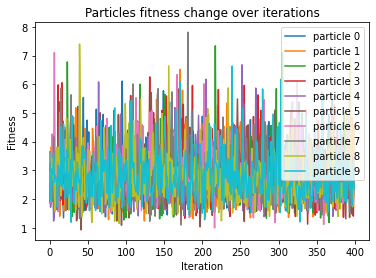

In [16]:
train_model_history.plot_fitness()

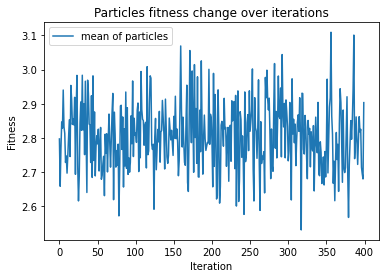

In [17]:
train_model_history.plot_mean_fitness()

In [18]:
best_model.decode_vec(mean_10_run_best_location)
best_model.one_pass()

train ={
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

test = {
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

# Evaluating on training set
best_model.set_training_input(X_train, y_train)
train['fitnessList'].append(best_model.evaluate_fitness(mean_10_run_best_location))
score = data.score(best_model, decimals, atol=0.03)
train['scoreA'].append(score[0])
train['scoreB'].append(score[1])
train['lossList'].append(best_model.loss)
# Evaluating on testing set
best_model.set_training_input(X_test, y_test)
test['fitnessList'].append(best_model.evaluate_fitness(mean_10_run_best_location))
score = data.score(best_model, decimals, atol=0.03)
test['scoreA'].append(score[0])
test['scoreB'].append(score[1])
test['lossList'].append(best_model.loss)

print("Testing on train - A: ", np.mean(train['scoreA']), " B: ", np.mean(train['scoreB']), " Fitness: ", round(np.mean(train['fitnessList']), 3), " Loss: ", round(np.mean(train['lossList']), 3))
print("Testing on test - A: ", np.mean(test['scoreA']), " B: ", np.mean(test['scoreB']), " Fitness: ", round(np.mean(test['fitnessList']), 3), " Loss: ", round(np.mean(test['lossList']), 3))


Testing on train - A:  0.22388059701492538  B:  0.22388059701492538  Fitness:  42.617  Loss:  0.023
Testing on test - A:  0.14705882352941177  B:  0.14705882352941177  Fitness:  51.403  Loss:  0.019
